In [1]:
import time
import matplotlib.pyplot as plt
import pandas as pd

import rlcache.utils.visualiser as viz
plt.close('all')
%matplotlib inline
%load_ext autoreload
%autoreload 2

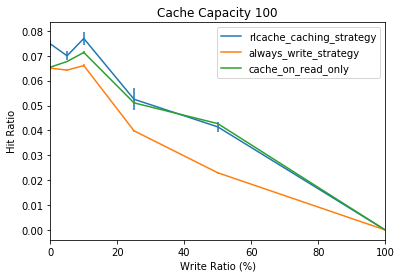

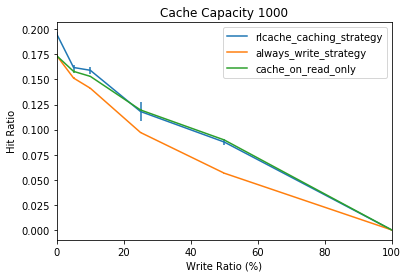

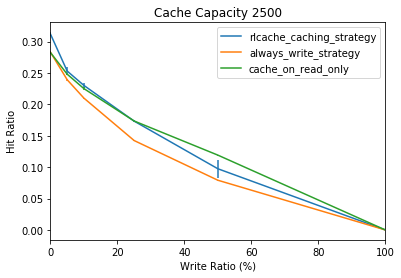

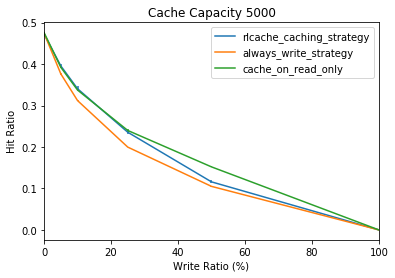

In [11]:
viz.save_everything_hit_rate('results',
                             ['rl_caching_strategy', 
                              'simple_strategy',
                              # 'random_caching',
                              'simple_strategy_read_only'
                              ],
                             'plots/caching_strategy',
                             overwrite_cols={
                                 'rl_caching_strategy': 'rlcache_caching_strategy',
                                 'simple_strategy': 'always_write_strategy',
                                 'random_caching': 'random_agent',
                                'simple_strategy_read_only': 'cache_on_read_only'
                             })

/home/samialab/Projects/rlcache/rlcache/utils/visualiser.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_should_cache[i] = (df_should_cache[i] - df_should_cache[i - 1]).item()
/home/samialab/Projects/rlcache/rlcache/utils/visualiser.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_should_not_cache[i] = (df_should_not_cache[i] - df_should_not_cache[i - 1]).item()
/home/samialab/Projects/rlcache/rlcache/utils/visualiser.py:168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

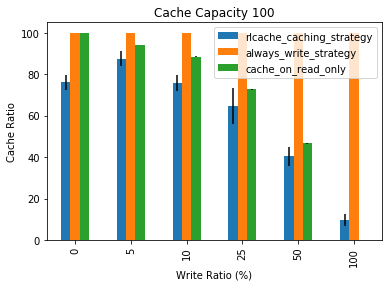

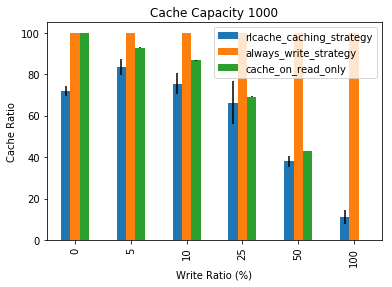

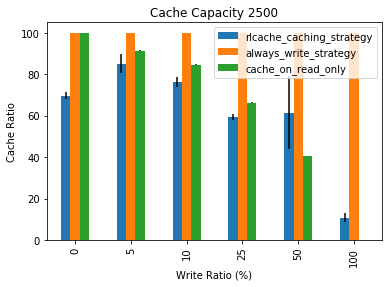

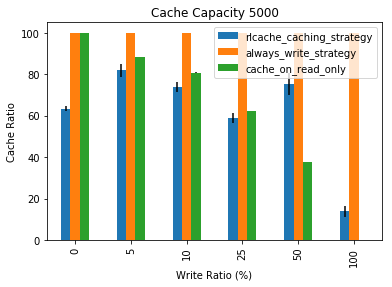

In [8]:

viz.save_everything_cache_rate('results',
                             ['rl_caching_strategy', 
                              'simple_strategy',
                              # 'random_caching',
                              'simple_strategy_read_only'
                              ],
                             'plots/caching_strategy',
                             overwrite_cols={
                                 'rl_caching_strategy': 'rlcache_caching_strategy',
                                 'simple_strategy': 'always_write_strategy',
                                 'random_caching': 'random_agent',
                                'simple_strategy_read_only': 'cache_on_read_only'
                             })


(0         0.145333
 1000      0.255333
 2000      0.283667
 3000      0.340000
 4000      0.353667
 5000      0.401000
 6000      0.407667
 7000      0.434667
 8000      0.337333
 9000      0.018000
 10000     0.102333
 11000     0.308000
 12000     0.349667
 13000     0.368667
 14000     0.413000
 15000     0.447333
 16000     0.467667
 17000     0.496333
 18000     0.331333
 19000     0.231667
 20000     0.220333
 21000     0.339667
 22000     0.443000
 23000     0.467667
 24000     0.505000
 25000     0.517667
 26000     0.457000
 27000     0.382333
 28000     0.288667
 29000     0.408667
             ...   
 92000     0.516000
 93000     0.501667
 94000     0.509667
 95000     0.489000
 96000     0.511333
 97000     0.501333
 98000     0.522667
 99000     0.521667
 100000    0.531667
 101000    0.502667
 102000    0.499000
 103000    0.509667
 104000    0.530333
 105000    0.521333
 106000    0.488000
 107000    0.483333
 108000    0.511333
 109000    0.504000
 110000    0.499000


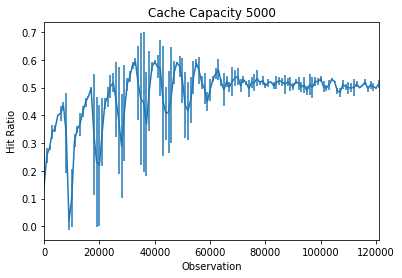

In [12]:
viz.save_zoomed_hit_rate('results/rl_caching_strategy', 'plots/caching_strategy', 5000)


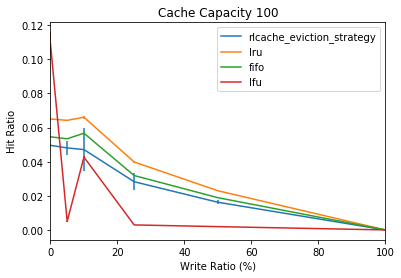

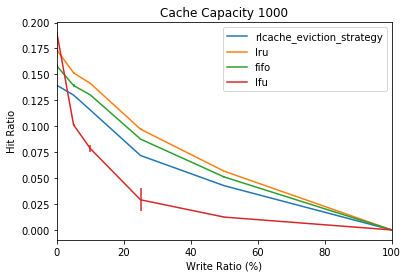

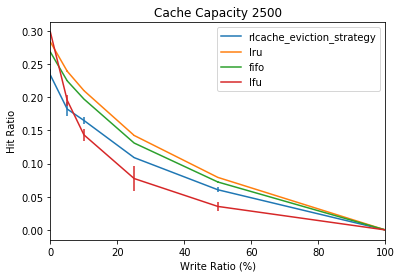

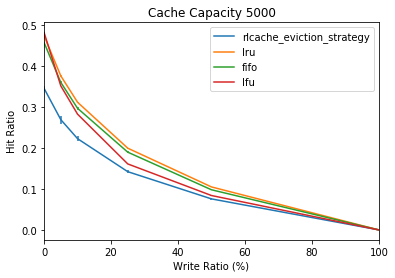

In [20]:
viz.save_everything_hit_rate('results',
                             ['rl_eviction_strategy', 
                              'simple_strategy',
                              'simple_strategy_fifo',
                              'simple_strategy_lfu'
                              ],
                             'plots/eviction_strategy',
                             overwrite_cols={
                                 'rl_eviction_strategy': 'rlcache_eviction_strategy',
                                 'simple_strategy': 'lru',
                                'simple_strategy_fifo': 'fifo',
                                 'simple_strategy_lfu': 'lfu'
                             })

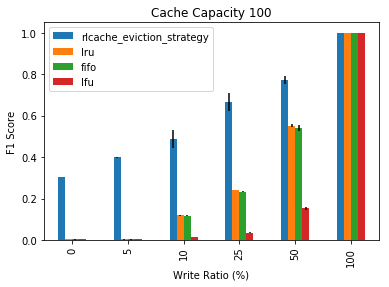

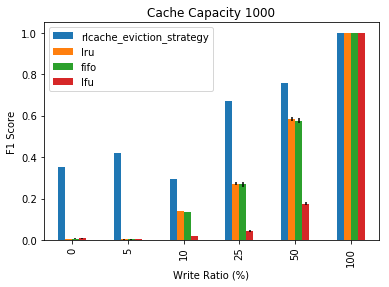

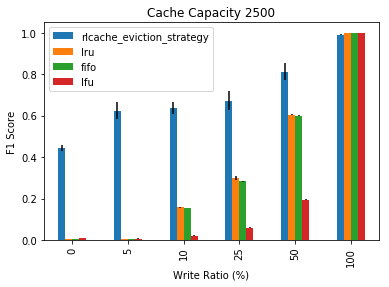

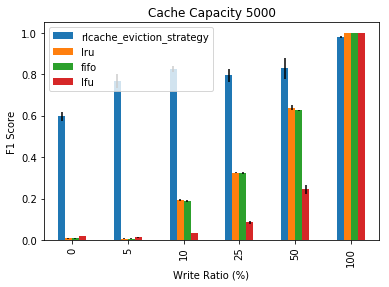

In [21]:
viz.save_everything_f1('results',
                             ['rl_eviction_strategy', 
                              'simple_strategy',
                              'simple_strategy_fifo',
                              'simple_strategy_lfu'
                              ],
                             'plots/eviction_strategy',
                             overwrite_cols={
                                 'rl_eviction_strategy': 'rlcache_eviction_strategy',
                                 'simple_strategy': 'lru',
                                'simple_strategy_fifo': 'fifo',
                                 'simple_strategy_lfu': 'lfu'
                             })

/home/samialab/Projects/rlcache/rlcache/utils/visualiser.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_should_cache[i] = (df_should_cache[i] - df_should_cache[i - 1]).item()
/home/samialab/Projects/rlcache/rlcache/utils/visualiser.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_should_not_cache[i] = (df_should_not_cache[i] - df_should_not_cache[i - 1]).item()
/home/samialab/Projects/rlcache/rlcache/utils/visualiser.py:168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

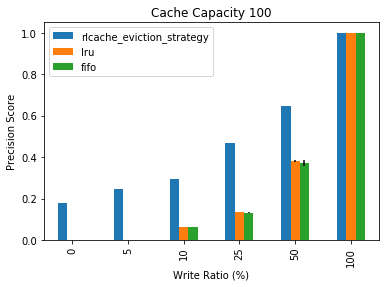

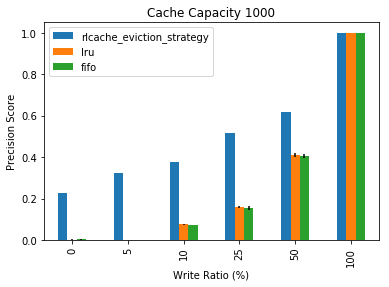

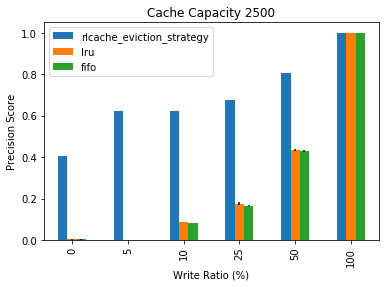

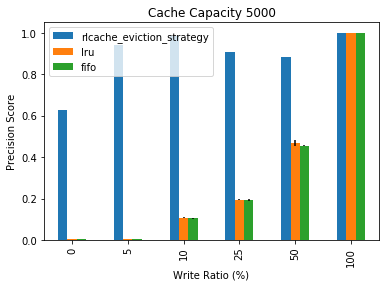

In [83]:

viz.save_everything_f1('results',
                             ['rl_eviction_strategy', 
                              'simple_strategy',
                              'simple_strategy_fifo'
                              ],
                             'plots/eviction_strategy',
                             overwrite_cols={
                                 'rl_eviction_strategy': 'rlcache_eviction_strategy',
                                 'simple_strategy': 'lru',
                                'simple_strategy_fifo': 'fifo'
                             },metric='precision')

results/rl_ttl_strategy/cache_capacity_1000/2019_05_27_09_55
results/rl_ttl_strategy/cache_capacity_1000/2019_05_26_11_38
results/simple_strategy/cache_capacity_1000/2019_05_16_17_27
results/simple_strategy/cache_capacity_1000/2019_05_16_17_11
results/simple_strategy/cache_capacity_1000/2019_05_18_17_44
results/rl_ttl_strategy/cache_capacity_2500/2019_05_31_02_54
results/rl_ttl_strategy/cache_capacity_2500/2019_05_21_09_13
results/simple_strategy/cache_capacity_2500/2019_05_18_10_59
results/simple_strategy/cache_capacity_2500/2019_05_18_18_10
results/simple_strategy/cache_capacity_2500/2019_05_18_17_57
results/rl_ttl_strategy/cache_capacity_5000/2019_05_26_15_01
results/rl_ttl_strategy/cache_capacity_5000/2019_05_29_17_59
results/simple_strategy/cache_capacity_5000/2019_05_18_11_15
results/simple_strategy/cache_capacity_5000/2019_05_18_18_22
results/simple_strategy/cache_capacity_5000/2019_05_18_18_35


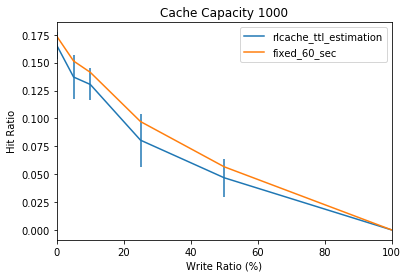

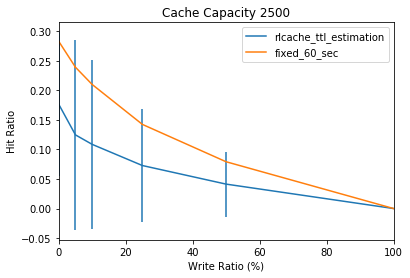

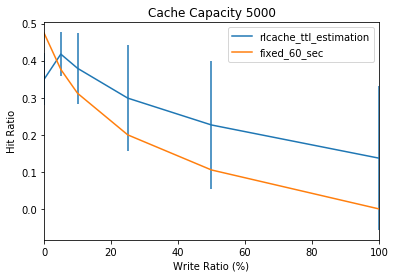

In [42]:


viz.save_everything_hit_rate('results',
                             [
                                 'rl_ttl_strategy', 
                              'simple_strategy'],
                             'plots/ttl_strategy',
                             overwrite_cols={'simple_strategy': 'fixed_60_sec', 
                                             'rl_ttl_strategy': 'rlcache_ttl_estimation'},
                             capacities=[1000, 2500, 5000]
                             )

(0         0.163000
 1000      0.265000
 2000      0.280000
 3000      0.271000
 4000      0.255000
 5000      0.216000
 6000      0.233000
 7000      0.252000
 8000      0.255000
 9000      0.282000
 10000     0.255000
 11000     0.231000
 12000     0.266000
 13000     0.259000
 14000     0.035000
 15000     0.128000
 16000     0.124000
 17000     0.117000
 18000     0.098000
 19000     0.130000
 20000     0.108000
 21000     0.089000
 22000     0.090000
 23000     0.107000
 24000     0.073000
 25000     0.089000
 26000     0.073000
 27000     0.096000
 28000     0.097000
 29000     0.106000
             ...   
 133000    0.090000
 134000    0.093000
 135000    0.072000
 136000    0.068000
 137000    0.079000
 138000    0.081000
 139000    0.074000
 140000    0.093000
 141000    0.097000
 142000    0.078000
 143000    0.093000
 144000    0.063000
 145000    0.069000
 146000    0.090000
 147000    0.089000
 148000    0.088000
 149000    0.085000
 150000    0.084000
 151000    0.079000


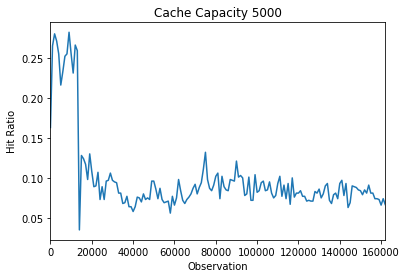

In [16]:
viz.save_zoomed_hit_rate('results/rl_all_strategy', 'plots/multi_agent', 5000)

results/rl_ttl_strategy/cache_capacity_1000/2019_05_27_09_55
results/rl_ttl_strategy/cache_capacity_1000/2019_05_26_11_38
results/rl_ttl_strategy/cache_capacity_1000/2019_05_27_09_55
results/rl_ttl_strategy/cache_capacity_1000/2019_05_26_11_38
results/rl_ttl_strategy/cache_capacity_2500/2019_05_31_02_54
results/rl_ttl_strategy/cache_capacity_2500/2019_05_21_09_13
results/rl_ttl_strategy/cache_capacity_2500/2019_05_31_02_54
results/rl_ttl_strategy/cache_capacity_2500/2019_05_21_09_13
results/rl_ttl_strategy/cache_capacity_5000/2019_05_26_15_01
results/rl_ttl_strategy/cache_capacity_5000/2019_05_29_17_59
results/rl_ttl_strategy/cache_capacity_5000/2019_05_26_15_01
results/rl_ttl_strategy/cache_capacity_5000/2019_05_29_17_59


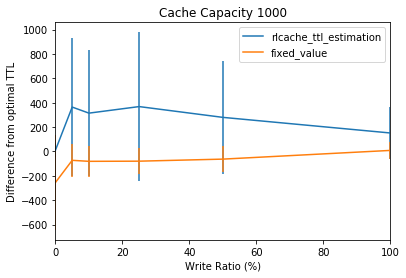

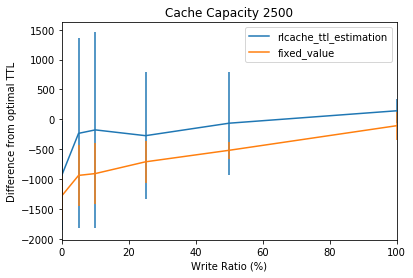

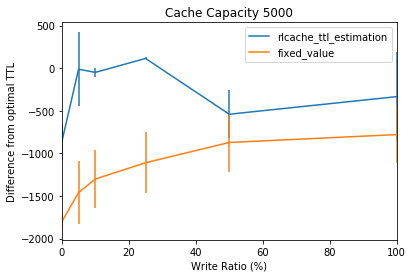

In [23]:
viz.save_ttl_diff('results',
                 ['rl_ttl_strategy', 
                  'fixed_value'],
                 'plots/ttl_strategy',
                 overwrite_cols={'simple_strategy': 'fixed_60_sec', 
                                 'rl_ttl_strategy': 'rlcache_ttl_estimation'},
                 capacities=[1000, 2500, 5000]
                 )